# Data description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

![shutterstock_1493059916.jpg](attachment:66b32c29-efff-4f79-a4a9-8b594625f498.jpg)

# Loading our data

we will load our data and and required libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
#import warnings
#warnings.filterwarnings("ignore")



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('data_cancer.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig = px.pie(df, values=df['diagnosis'].value_counts().values, names=df['diagnosis'].value_counts().index)
fig.show()

Our target vaoues are slightly imbalanced so we may not need to use oversampling or undersampling techniques.

# Feature selection with correlation matrix

Text(0.5, 1.05, 'Correlation of df Features')

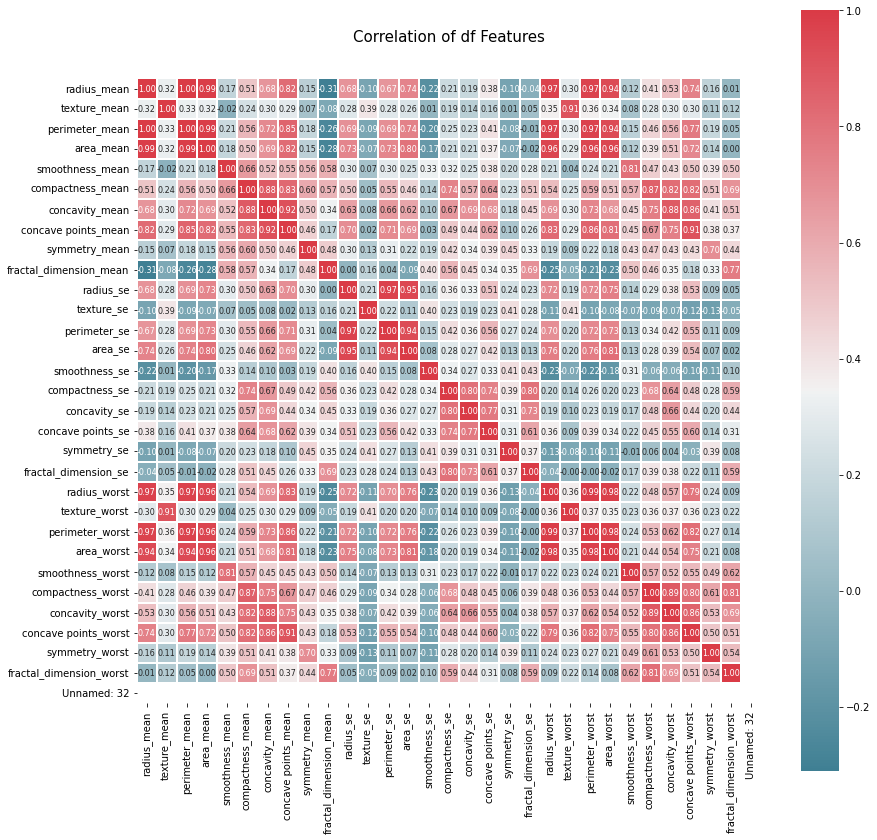

In [ ]:
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

As we can see many features are correlated to each other so we will remove highly correlated features bigger than 0.95

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8580/616785541.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



We have now **26** features

In [ ]:
len(df.columns)

26

# Checking formissing values

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
texture_worst                0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

We don`t need "Unnamed: 32"  and id columns so we can drop them 

In [ ]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

# Encoding

We will handle categorical values using LabelEncoder so we can use them in ANN

In [ ]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

# Scaling the Data

When we create the artificial neural network, then we have to scale the data into smaller numbers because the deep learning algorithm multiplies the weights and input data of the nodes and it takes lots of time, So for reducing that time we scale the data.

We will scalling the data with StandardScaler

In [ ]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### What are artificial neural networks?

An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.

A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input. The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.

![ai-artificial-neural-network-alex-castrounis.png](attachment:ce2a1faa-aec3-49a3-9838-fb93ad3361dc.png)

we will import Keras and its packages.

In [ ]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Creating Layers
After importing those libraries, we create the three types of layers:

- Input layer
- Hidden layer
- Output layer

In [ ]:
fun = ["'relu'","'sigmoid'","'softmax'"]

In [ ]:
#from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
#ann =Sequential()

#for i in fun:
  #  print(ann.add(Dense(units = 30,activation = i)))
  #  ann.add(BatchNormalization())
  #  ann.add(Dropout(0.5))

In [ ]:
#for i in fun:
 #   print(i)

# 1.RELU

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

# Compiling and Fitting

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used.

We use sigmoid function in output layer

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)


![download.png](attachment:4369040a-b9e8-4c46-9f2d-d527a3bad265.png)

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 0.5275 - accuracy: 0.8000 - val_loss: 0.4215 - val_accuracy: 0.8684
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.8110 - val_loss: 0.3465 - val_accuracy: 0.9298
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3347 - accuracy: 0.8681 - val_loss: 0.2922 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.8857 - val_loss: 0.2505 - val_accuracy: 0.9737
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.8945 - val_loss: 0.2182 - val_accuracy: 0.9737
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.9209 - val_loss: 0.1939 - val_accuracy: 0.9825
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2006 - accuracy: 0.9231 - val_loss: 0.1751 - val_accuracy: 0.9825
Epoch 8/100


Let us see summary of our model

In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                720       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


Text(0.5, 1.0, 'model accuracy')

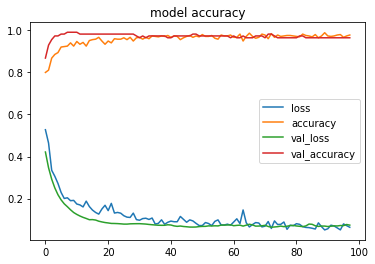

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()
plt.title('model accuracy')

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score1 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score1)

[[73  2]
 [ 2 37]]
score is: 0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



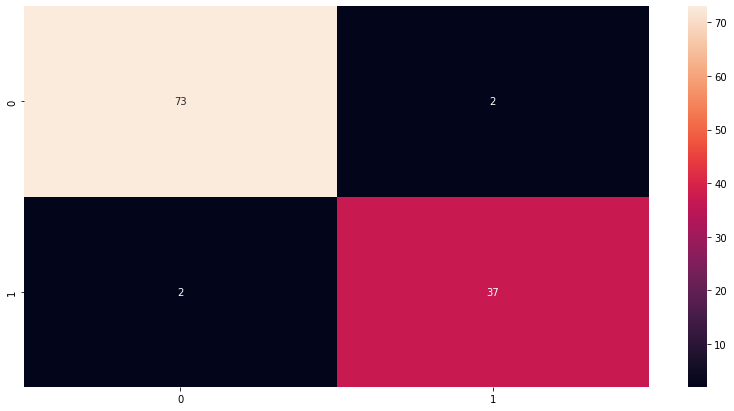

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

# 2.Sigmoid

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'sigmoid'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 2s 26ms/step - loss: 0.4044 - accuracy: 0.8242 - val_loss: 0.5238 - val_accuracy: 0.6579
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.8703 - val_loss: 0.4729 - val_accuracy: 0.7018
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2844 - accuracy: 0.8901 - val_loss: 0.4286 - val_accuracy: 0.7193
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.9099 - val_loss: 0.3906 - val_accuracy: 0.7632
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2077 - accuracy: 0.9143 - val_loss: 0.3569 - val_accuracy: 0.8070
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2117 - accuracy: 0.9077 - val_loss: 0.3257 - val_accuracy: 0.8421
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1840 - accuracy: 0.9187 - val_loss: 0.2970 - val_accuracy: 0.8684
Epoch 8/100


In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                720       
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


<AxesSubplot:>

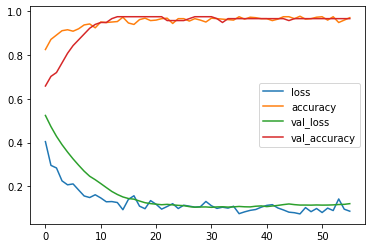

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score2 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score2)

[[73  2]
 [ 2 37]]
score is: 0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



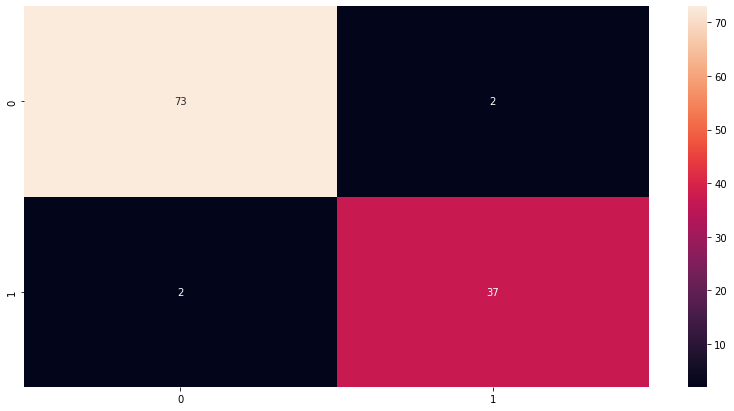

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

# 3.Tanh

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'tanh'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 2s 20ms/step - loss: 0.8222 - accuracy: 0.5978 - val_loss: 0.5471 - val_accuracy: 0.7807
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6154 - accuracy: 0.6879 - val_loss: 0.4108 - val_accuracy: 0.8772
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.4482 - accuracy: 0.7824 - val_loss: 0.3326 - val_accuracy: 0.8947
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.3503 - accuracy: 0.8549 - val_loss: 0.2864 - val_accuracy: 0.9123
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3081 - accuracy: 0.8703 - val_loss: 0.2510 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2634 - accuracy: 0.8901 - val_loss: 0.2212 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 0.2453 - accuracy: 0.9077 - val_loss: 0.2016 - val_accuracy: 0.9561
Epoch 8

In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                720       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


<AxesSubplot:>

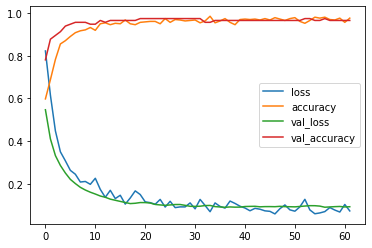

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score3 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score3)

[[73  2]
 [ 2 37]]
score is: 0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



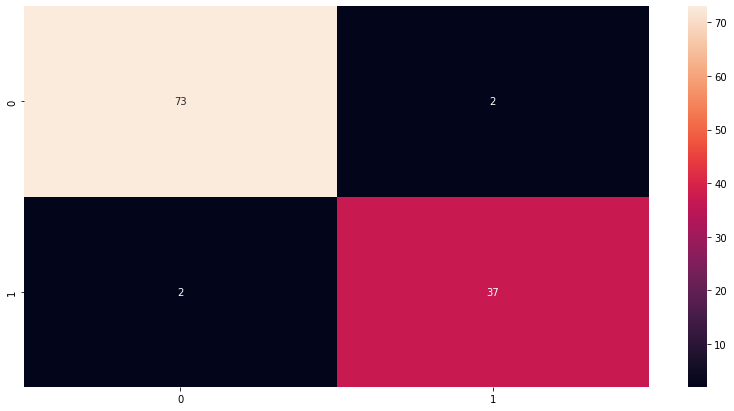

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

# 4.SOFTMAX

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'softmax'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.7446 - accuracy: 0.5385 - val_loss: 0.6625 - val_accuracy: 0.7632
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5437 - accuracy: 0.7341 - val_loss: 0.6413 - val_accuracy: 0.7368
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4303 - accuracy: 0.8044 - val_loss: 0.6221 - val_accuracy: 0.7105
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3784 - accuracy: 0.8462 - val_loss: 0.6060 - val_accuracy: 0.6754
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3302 - accuracy: 0.8791 - val_loss: 0.5920 - val_accuracy: 0.6754
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.9143 - val_loss: 0.5782 - val_accuracy: 0.6667
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2548 - accuracy: 0.9077 - val_loss: 0.5655 - val_accuracy: 0.6667
Epoch 8/100


In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                720       
                                                                 
 batch_normalization_3 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


<AxesSubplot:>

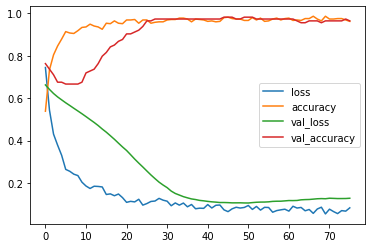

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score4 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score4)

[[73  2]
 [ 2 37]]
score is: 0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



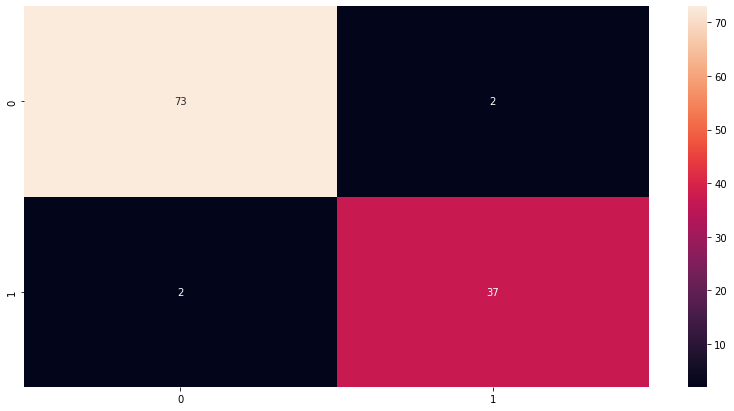

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

# 5.SOFTSIGN

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'softsign'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 3s 19ms/step - loss: 0.7492 - accuracy: 0.6505 - val_loss: 0.4989 - val_accuracy: 0.8246
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5432 - accuracy: 0.7714 - val_loss: 0.4033 - val_accuracy: 0.8947
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.7890 - val_loss: 0.3393 - val_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8220 - val_loss: 0.3009 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.8769 - val_loss: 0.2695 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.8879 - val_loss: 0.2424 - val_accuracy: 0.9298
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.8901 - val_loss: 0.2213 - val_accuracy: 0.9298
Epoch 8/100


In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                720       
                                                                 
 batch_normalization_4 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


<AxesSubplot:>

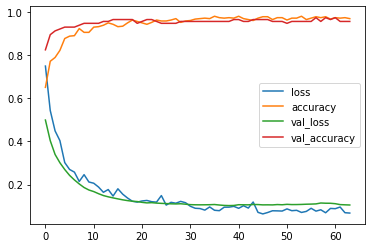

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score5 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score5)

[[72  3]
 [ 2 37]]
score is: 0.956140350877193


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



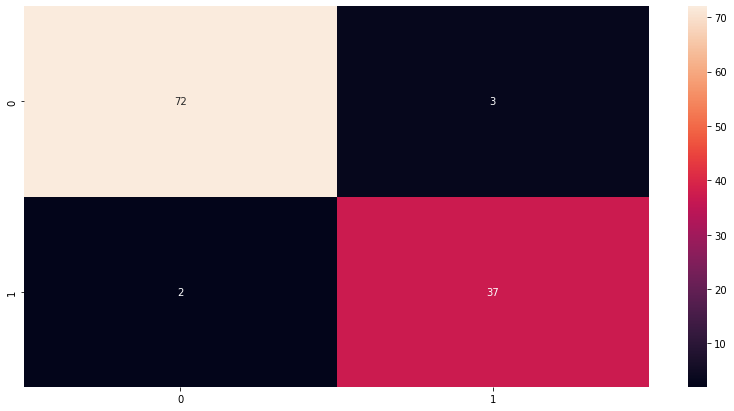

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

# 6.SWISH


In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'swish'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))



#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 1.2964 - accuracy: 0.3802 - val_loss: 0.7173 - val_accuracy: 0.5175
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8707 - accuracy: 0.5582 - val_loss: 0.5243 - val_accuracy: 0.8333
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7363 - val_loss: 0.4142 - val_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.7934 - val_loss: 0.3436 - val_accuracy: 0.9298
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8374 - val_loss: 0.2984 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.8286 - val_loss: 0.2643 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.8989 - val_loss: 0.2407 - val_accuracy: 0.9561
Epoch 8/100


In [ ]:
#taking summary of layers
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                720       
                                                                 
 batch_normalization_5 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 871
Trainable params: 811
Non-trainable params: 60
_________________________________________________________________


Text(0.5, 1.0, 'model accuracy')

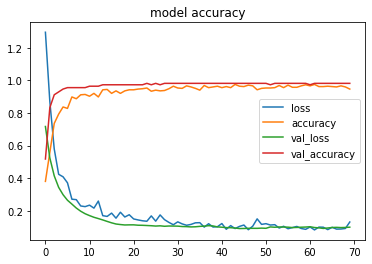

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()
plt.title('model accuracy')

In [ ]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score6 = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score6)

[[75  0]
 [ 2 37]]
score is: 0.9824561403508771


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



AttributeError: 'NoneType' object has no attribute 'to_frame'

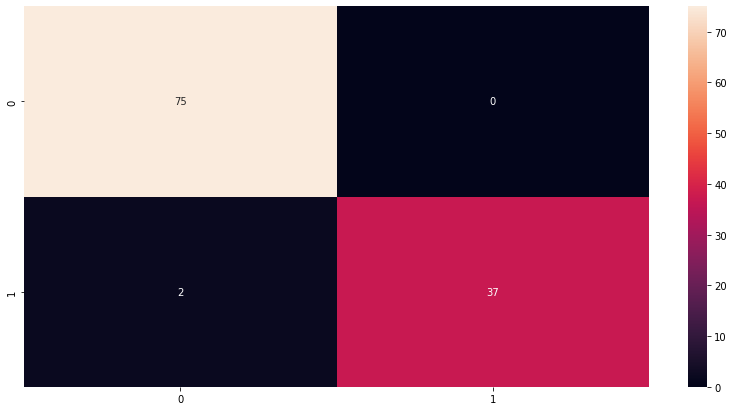

In [ ]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print("ACCURACY SCORE")
print("---------------")
print("Relu:")
print(score1)
print("Sigmoid:")

print(score2)
print("Tanh:")
print(score3)
print("Softmax:")
print(score4)
print("Softsign:")
print(score5)
print("Swish:")
print(score6)

ACCURACY SCORE
---------------
Relu:
0.9649122807017544
Sigmoid:
0.9649122807017544
Tanh:
0.9649122807017544
Softmax:
0.9649122807017544
Softsign:
0.956140350877193
Swish:
0.9824561403508771


# ANN Visualizer 

In [ ]:
#!pip install keras
#!pip install ann_visualizer
#!pip install graphviz

In [ ]:
#from ann_visualizer.visualize import ann_viz;
#from graphviz import Source
#ann_viz(ann, view=True, filename='network.gv', title='My Neural Network')
#Source.from_file('./network.gv')

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 0.5622 - accuracy: 0.7429 - val_loss: 0.4430 - val_accuracy: 0.8421
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4954 - accuracy: 0.7780 - val_loss: 0.3652 - val_accuracy: 0.8860
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3733 - accuracy: 0.8396 - val_loss: 0.3097 - val_accuracy: 0.9035
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8593 - val_loss: 0.2726 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8879 - val_loss: 0.2436 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.8901 - val_loss: 0.2242 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.9033 - val_loss: 0.2086 - val_accuracy: 0.9474
Epoch 8/100


[('relu', [0.9649122807017544]),
 ('sigmoid', [0.9824561403508771]),
 ('tanh', [0.9736842105263158]),
 ('softmax', [0.9736842105263158]),
 ('softsign', [0.9649122807017544]),
 ('swish', [0.9736842105263158])]

<function __main__.get_classification_report(y_test, y_pred)>